In [23]:
from deeptools import heatmapper  # You need to have deeptools3 installed
import numpy as np
import gzip
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
sns.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.markersize'] = 20
sns.set_context('talk')


from palettable.cartocolors.qualitative import Bold_10, Vivid_10_r, Antique_10_r
from matplotlib import markers

In [2]:
%matplotlib inline

# ASTARR Profile Plots

In [24]:
hm = heatmapper.heatmapper() # create heatmapper object
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.common_background.GC_content.random5k.V4.refpoint.mat.gz')

In [25]:
hm.__dict__['parameters']['group_boundaries']

[0, 2837, 7832, 12832, 17836]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


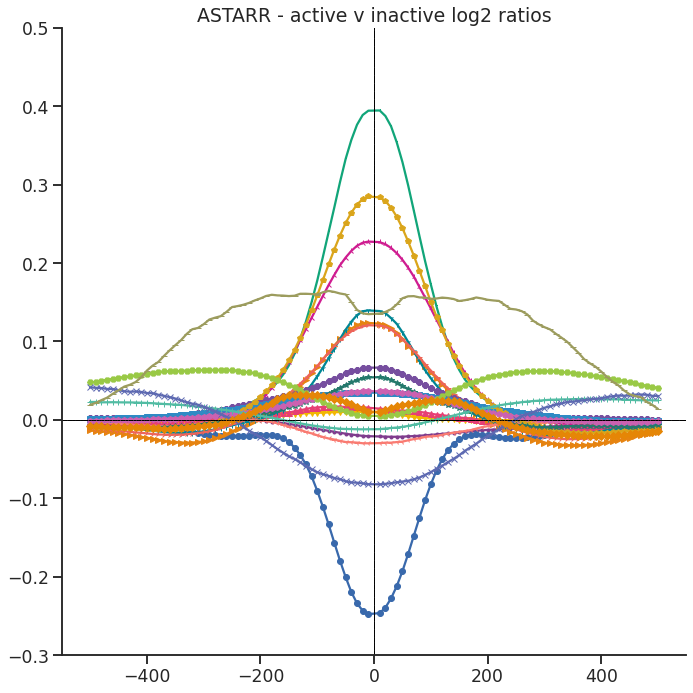

In [43]:
sns.set_context('talk', font_scale=1.05)
fig, ax = plt.subplots(figsize=[10,10])
for ii in range(len(hm.__dict__['parameters']['sample_labels'])):
    if hm.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2' or hm.__dict__['parameters']['sample_labels'][ii] == 'NRF1': continue
    max_val=np.max(hm.matrix.matrix[:2837, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm.matrix.matrix[:2837, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm.matrix.matrix[12831:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
# lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR - active v inactive log2 ratios")
plt.ylim([-0.3,0.5])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.zoomed.png')

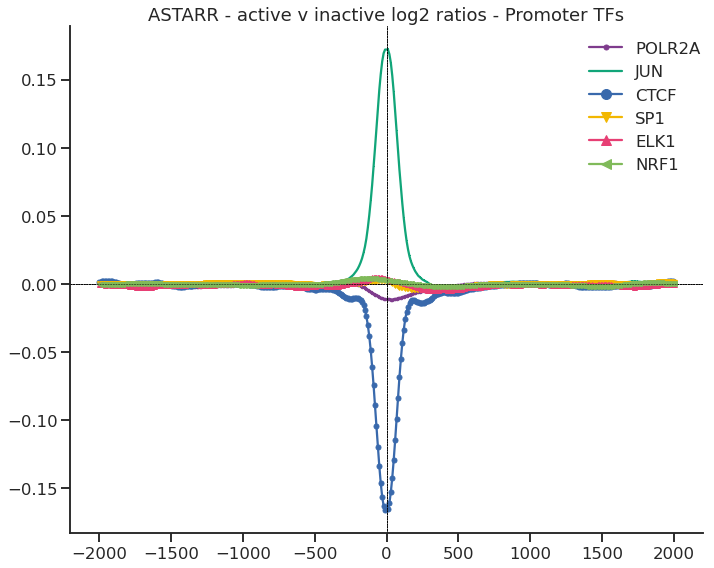

In [10]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm.__dict__['parameters']['sample_labels'][0:6])):
    max_val=np.max(hm.matrix.matrix[:2837, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,75)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm.matrix.matrix[:2837, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm.matrix.matrix[12831:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR - active v inactive log2 ratios - Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

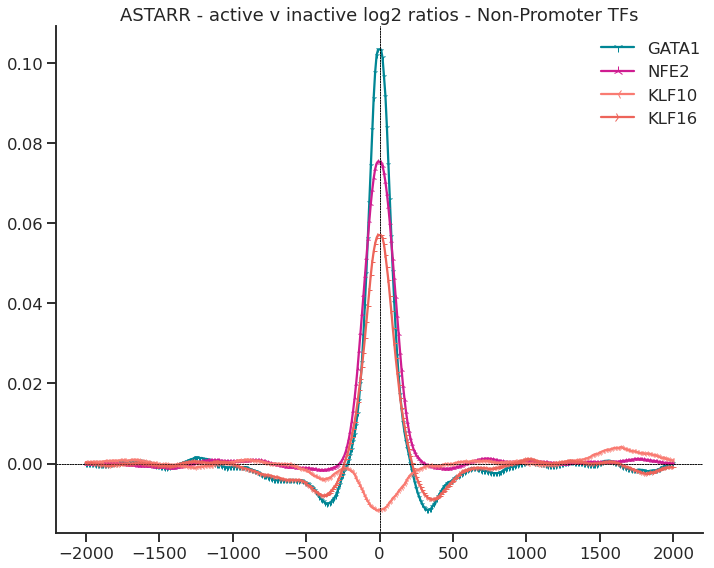

In [11]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(7,11):
    max_val=np.max(hm.matrix.matrix[:2837, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,75)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm.matrix.matrix[:2837, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm.matrix.matrix[12831:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR - active v inactive log2 ratios - Non-Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

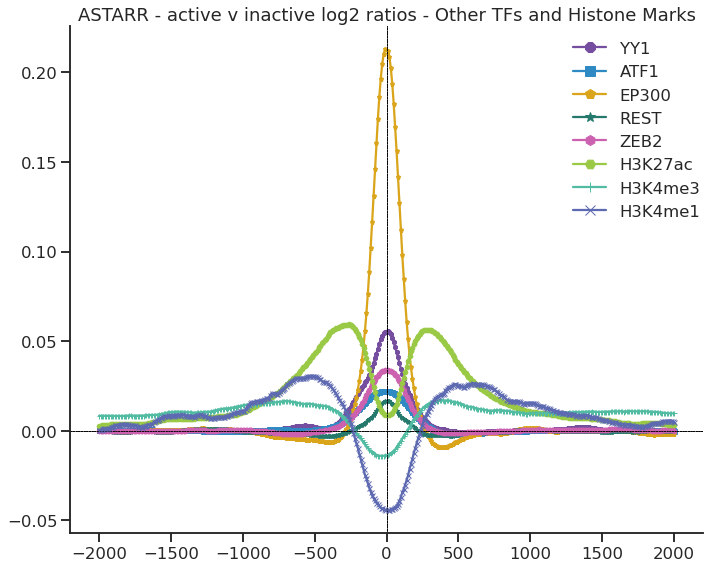

In [12]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val=np.max(hm.matrix.matrix[:2837, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,75)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm.matrix.matrix[:2837, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm.matrix.matrix[12831:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR - active v inactive log2 ratios - Other TFs and Histone Marks")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

## Profile plots with ASTARR_promoters_vs_CommonBackgroundSet_promoters

In [3]:
hm1 = heatmapper.heatmapper() # create heatmapper object
hm1.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_CommonBackgroundSet.promoters.mat.gz')

In [15]:
hm1.__dict__['parameters']['group_boundaries']

[0, 555, 1583]

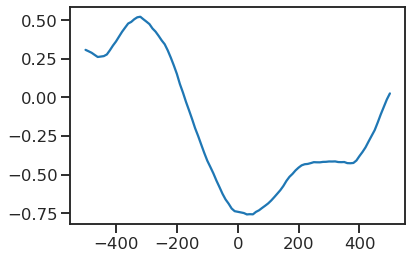

In [35]:
plt.plot((np.delete((np.arange(0,101)-50), 50))*10,
               np.log2((np.nanmean(hm1.matrix.matrix[:555, 150:250], axis=0))/
                       (np.nanmean(hm1.matrix.matrix[555:, 150:250], axis=0))))

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


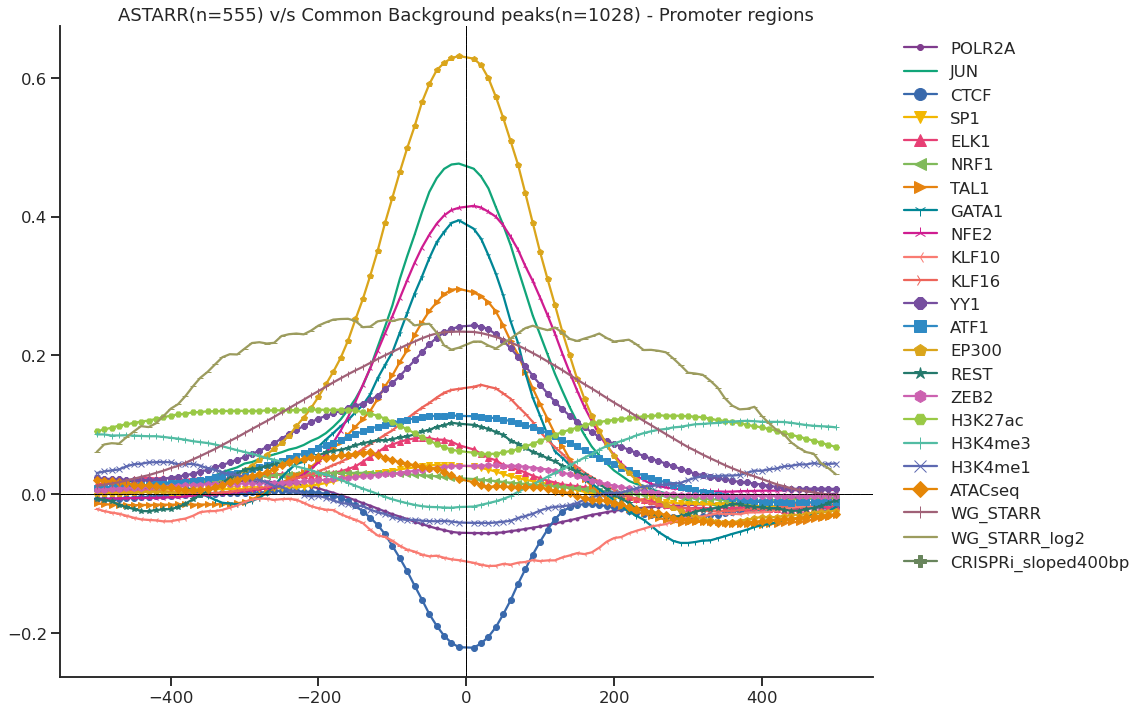

In [4]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm1.__dict__['parameters']['sample_labels'])):
    if hm1.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2': continue
    max_val=np.max(hm1.matrix.matrix[:555, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm1.matrix.matrix[:555, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm1.matrix.matrix[555:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR(n=555) v/s Common Background peaks(n=1028) - Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/ASTARR.active_v_commonBackground.Promoter.zoomed.pdf')

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


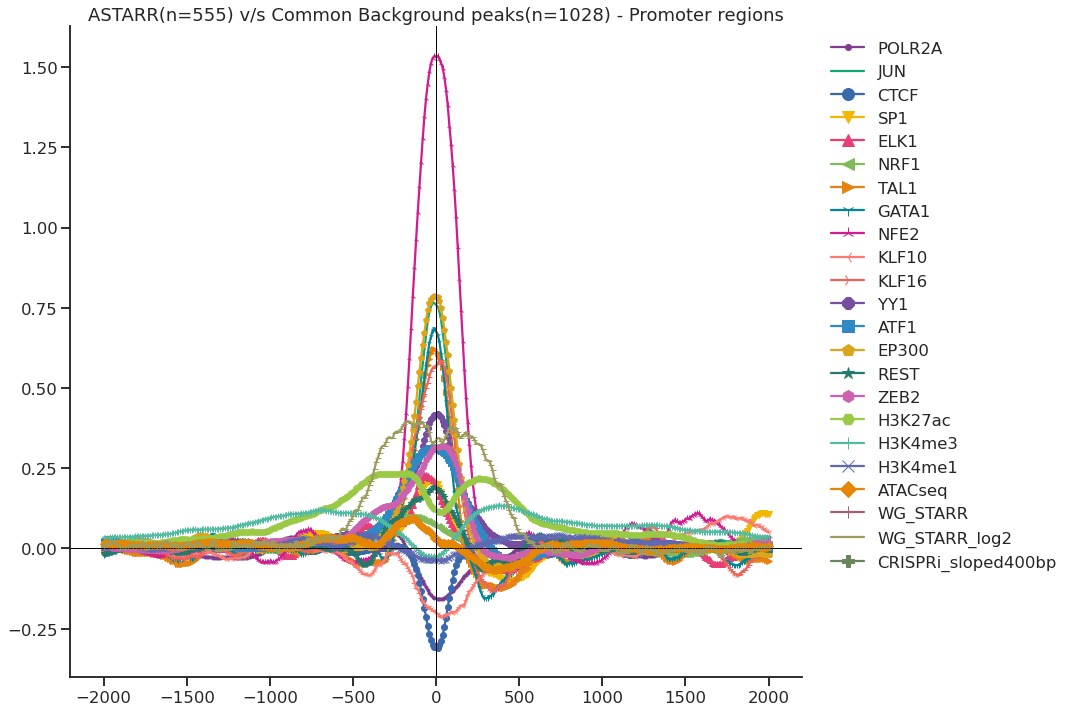

In [40]:
fig, ax = plt.subplots(figsize=[15,10])
for ii in range(len(hm1.__dict__['parameters']['sample_labels'])):
    if hm1.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2': continue
    max_val=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
               np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))/
                       (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR(n=555) v/s Common Background peaks(n=1028) - Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

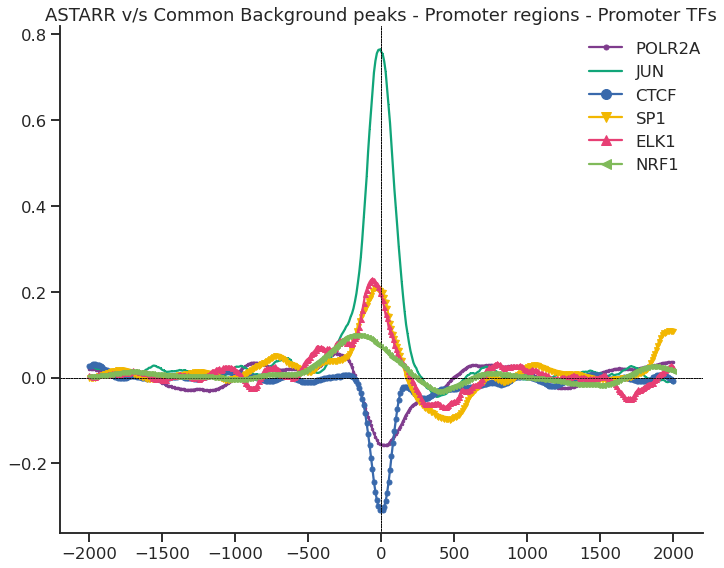

In [12]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm1.__dict__['parameters']['sample_labels'][0:6])):
    max_val=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR v/s Common Background peaks - Promoter regions - Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

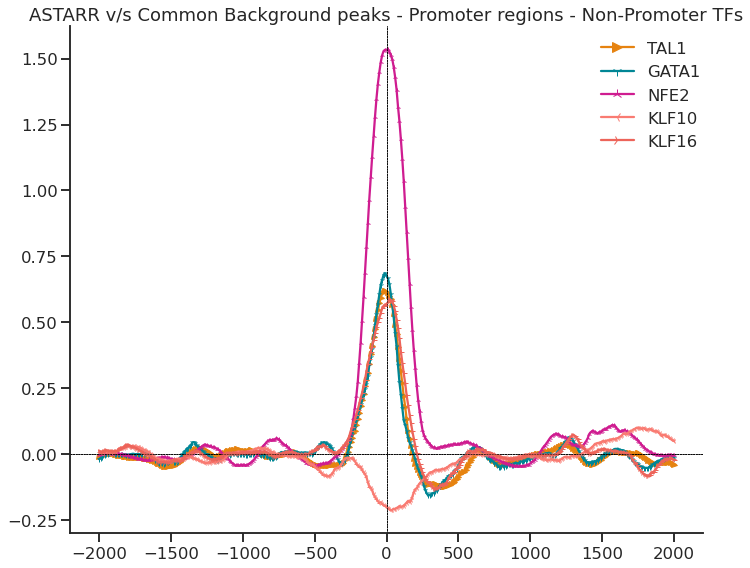

In [27]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(6,11):
    max_val=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR v/s Common Background peaks - Promoter regions - Non-Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

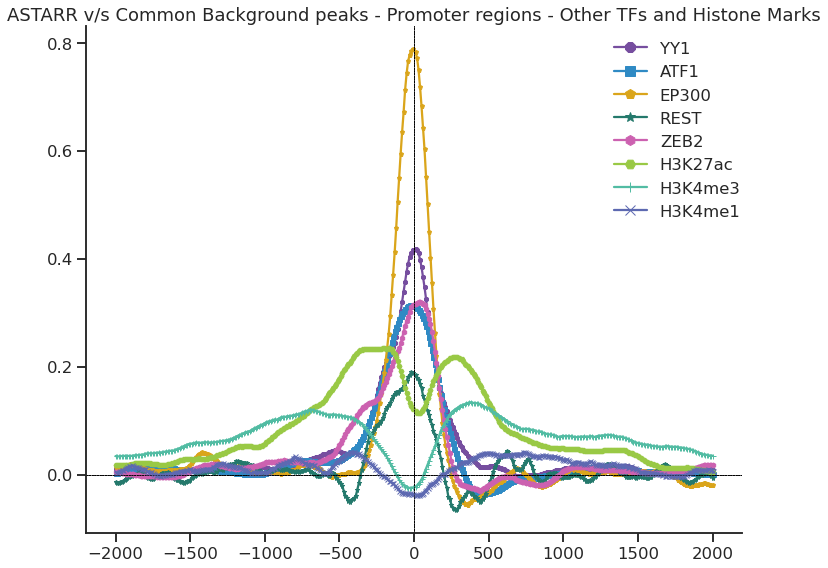

In [14]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR v/s Common Background peaks - Promoter regions - Other TFs and Histone Marks")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

## Profile plots with ASTARR_distal_vs_CommonBackgroundSet_distal

In [5]:
hm2 = heatmapper.heatmapper() # create heatmapper object
hm2.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_CommonBackgroundSet.rest.mat.gz')

In [15]:
hm2.__dict__['parameters']['group_boundaries']

[0, 2282, 6256]

In [6]:
6256-2282

3974

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


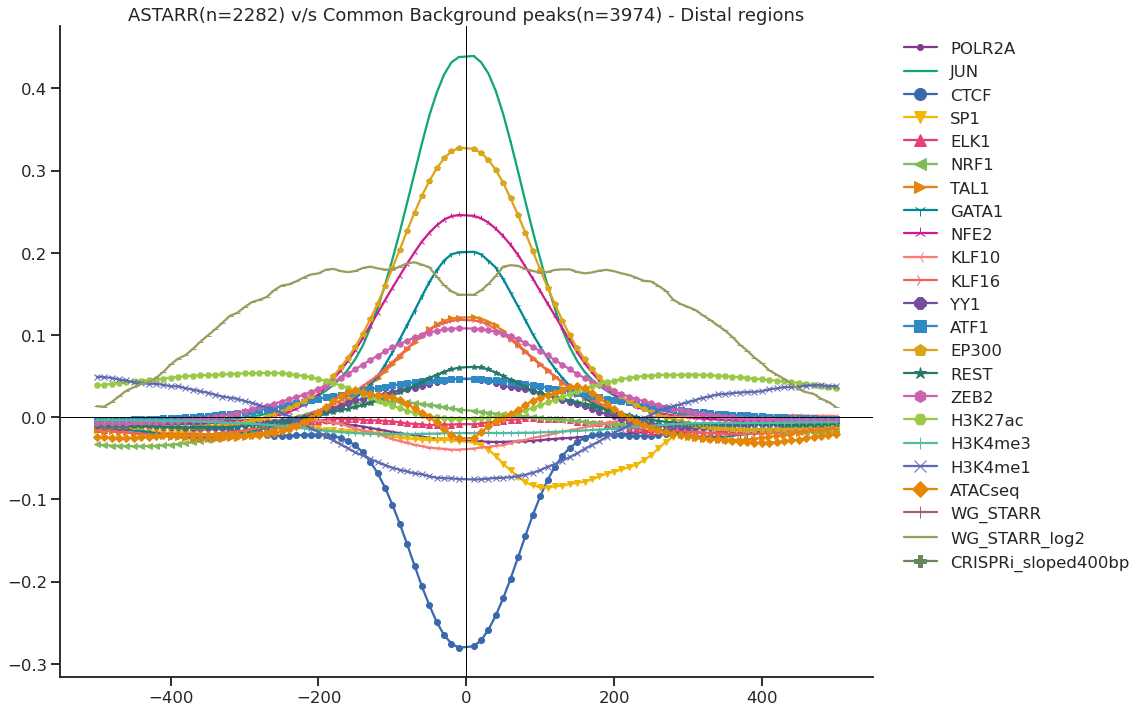

In [11]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    if hm2.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2': continue
    max_val=np.max(hm2.matrix.matrix[:2282, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm2.matrix.matrix[:2282, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm2.matrix.matrix[2282:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR(n=2282) v/s Common Background peaks(n=3974) - Distal regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/ASTARR.active_v_commonBackground.Distal.zoomed.pdf')

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


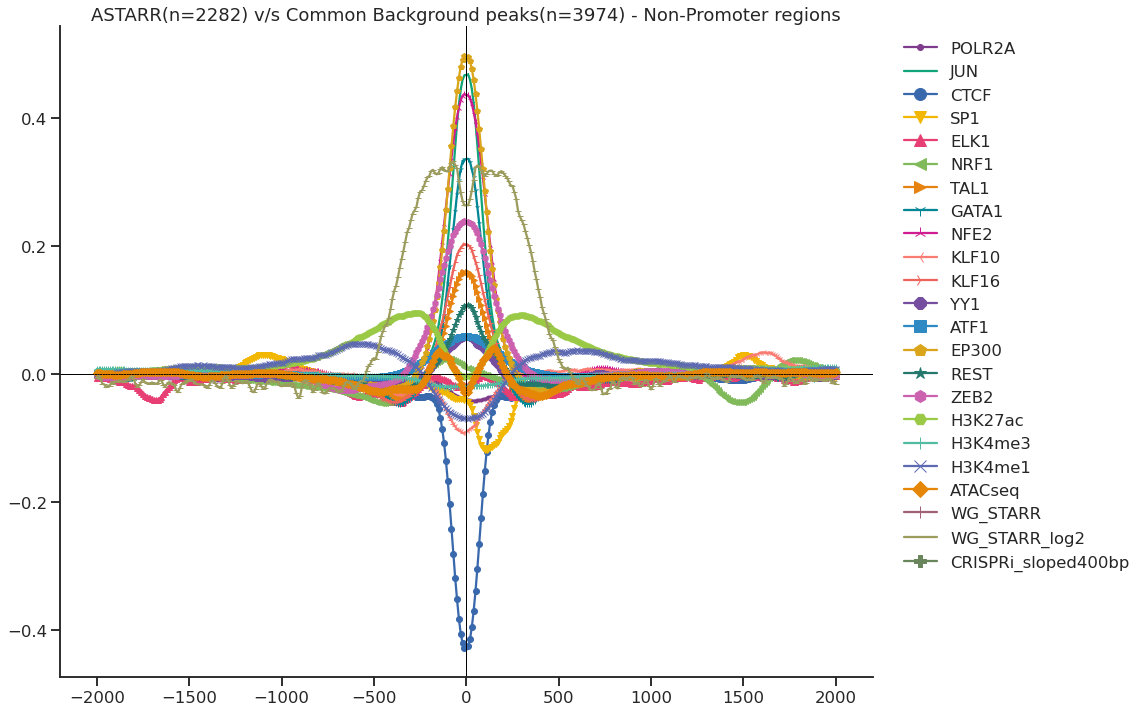

In [9]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    if hm2.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2': continue
    max_val=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
               np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))/
                       (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR(n=2282) v/s Common Background peaks(n=3974) - Non-Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

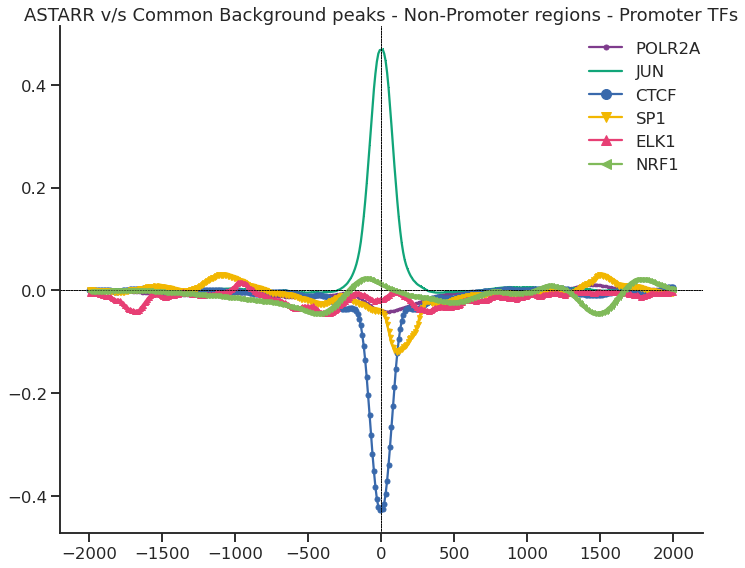

In [16]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'][0:6])):
    max_val=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR v/s Common Background peaks - Non-Promoter regions - Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

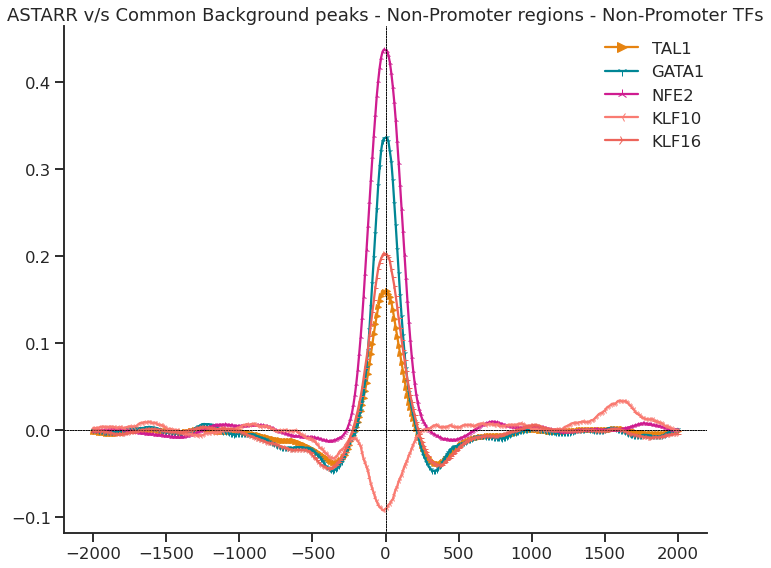

In [28]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(6,11):
    max_val=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR v/s Common Background peaks - Non-Promoter regions - Non-Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

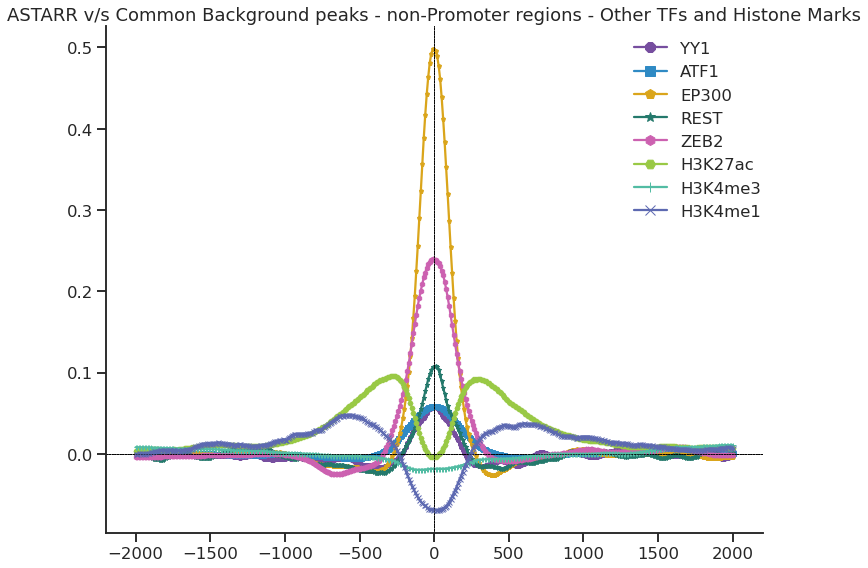

In [18]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR v/s Common Background peaks - non-Promoter regions - Other TFs and Histone Marks")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

#### Difference in AUC b/w promoter and distal

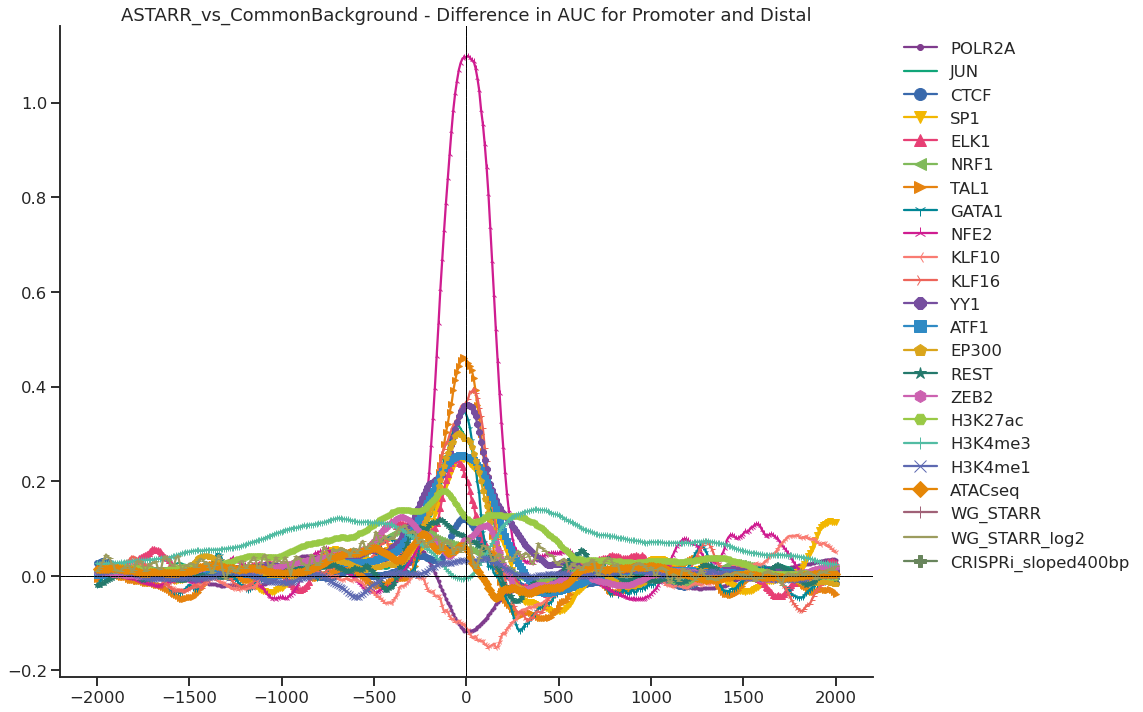

In [20]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm1.__dict__['parameters']['sample_labels'])):
    if hm1.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2': continue
        
    max_val_promoter=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
# plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

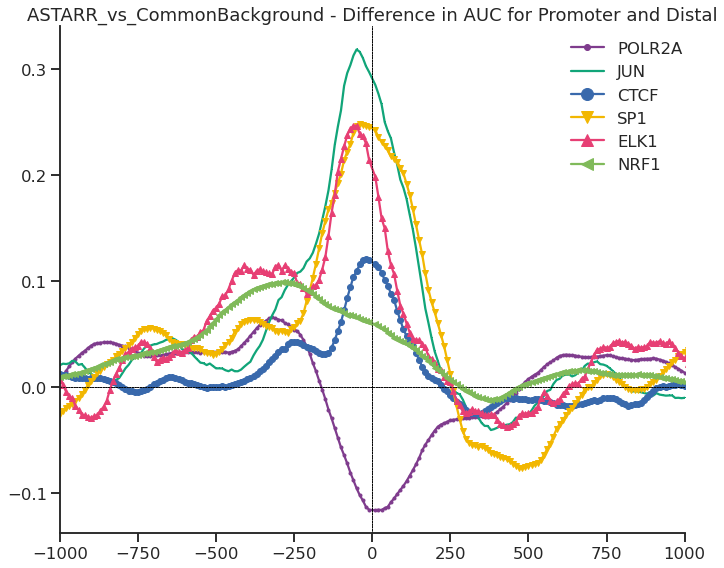

In [24]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm.__dict__['parameters']['sample_labels'][0:6])):
    max_val_promoter=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

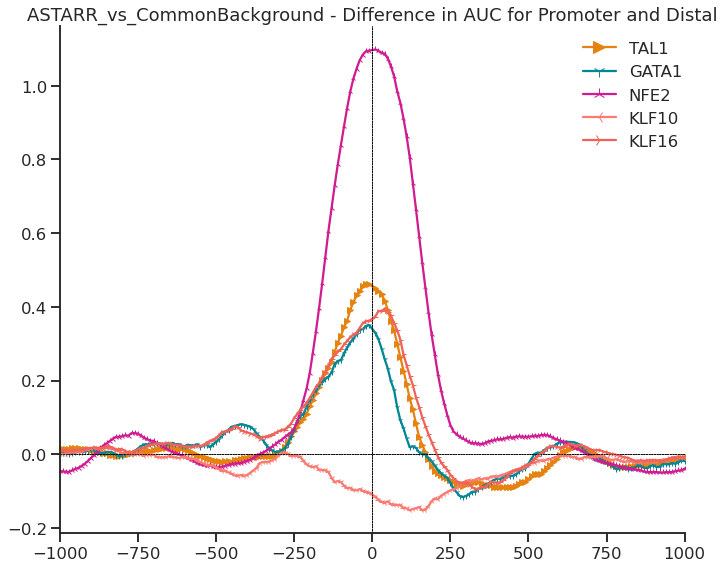

In [25]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(6,11):  
    max_val_promoter=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

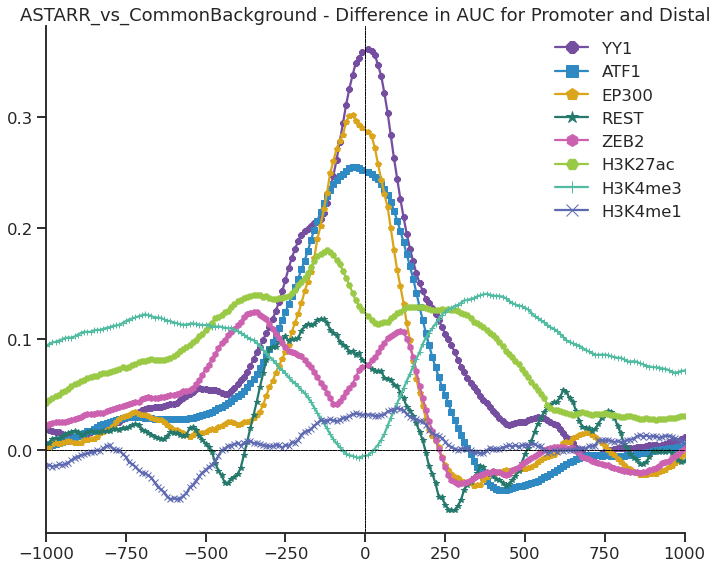

In [26]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):   
    max_val_promoter=np.max(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm1.matrix.matrix[:555, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm1.matrix.matrix[555:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm2.matrix.matrix[:2282, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm2.matrix.matrix[2282:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("ASTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

# wgSTARR Profile Plots

In [36]:
hm = heatmapper.heatmapper() # create heatmapper object
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.common_background.GC_content.random5k.V3.refpoint.mat.gz')

In [27]:
hm.__dict__['parameters']['group_boundaries']

[0, 2837, 7832, 12832, 17836]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


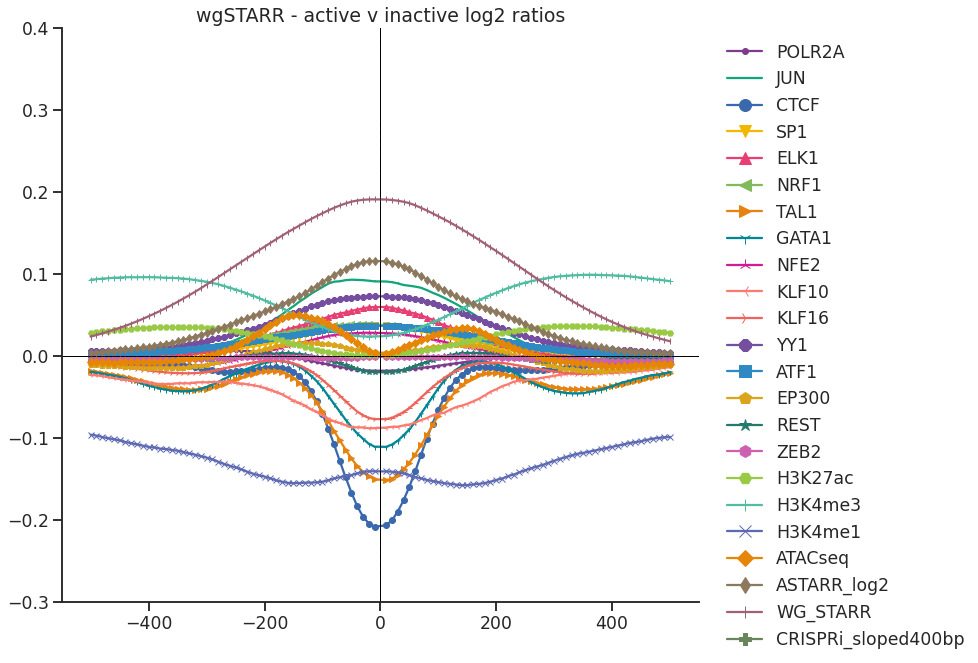

In [38]:
sns.set_context('talk', font_scale=1.05)
fig, ax = plt.subplots(figsize=[14,10])
for ii in range(len(hm.__dict__['parameters']['sample_labels'])):
    if hm.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm.matrix.matrix[7832:12832, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm.matrix.matrix[7832:12832, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm.matrix.matrix[12832:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR - active v inactive log2 ratios")
plt.ylim([-0.3,0.4])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/wgstarr.active_v_inactive.log2.zoomed.png')

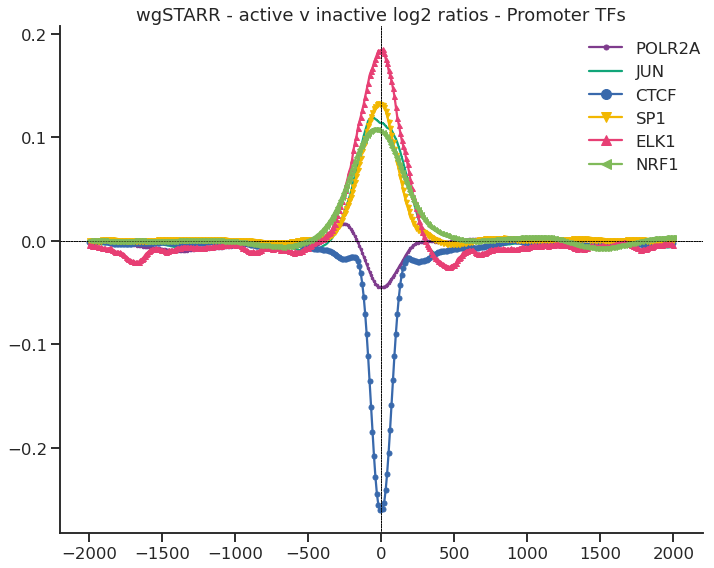

In [39]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm.__dict__['parameters']['sample_labels'][0:6])):
    max_val=np.max(hm.matrix.matrix[7831:12831, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm.matrix.matrix[7831:12831, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm.matrix.matrix[12831:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR - active v inactive log2 ratios - Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

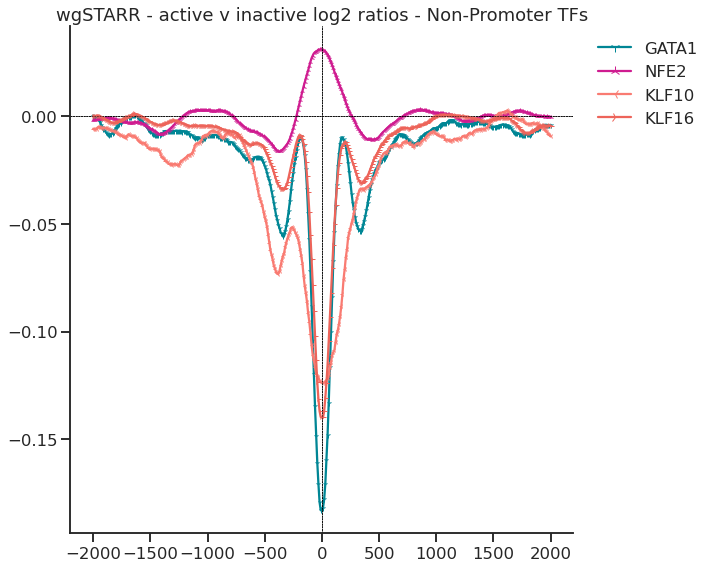

In [40]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(7,11):
    max_val=np.max(hm.matrix.matrix[7831:12831, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm.matrix.matrix[7831:12831, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm.matrix.matrix[12831:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR - active v inactive log2 ratios - Non-Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

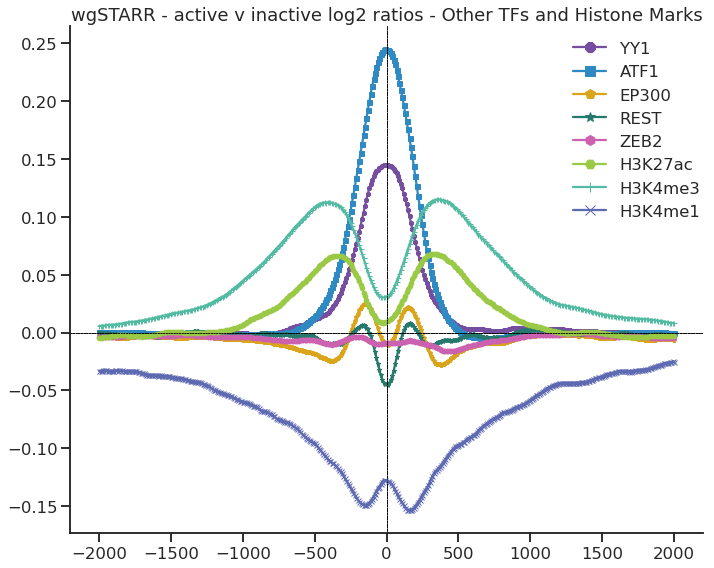

In [41]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val=np.max(hm.matrix.matrix[7831:12831, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm.matrix.matrix[7831:12831, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm.matrix.matrix[12831:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR - active v inactive log2 ratios - Other TFs and Histone Marks")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

## Profile plots with wgSTARR_promoters_vs_CommonBackgroundSet_promoters

In [12]:
hm2 = heatmapper.heatmapper() # create heatmapper object
hm2.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/wgSTARR_CommonBackgroundSet.promoters.mat.gz')

hm2.__dict__['parameters']['group_boundaries']

[0, 1684, 2541]

In [13]:
2541-1684

857

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


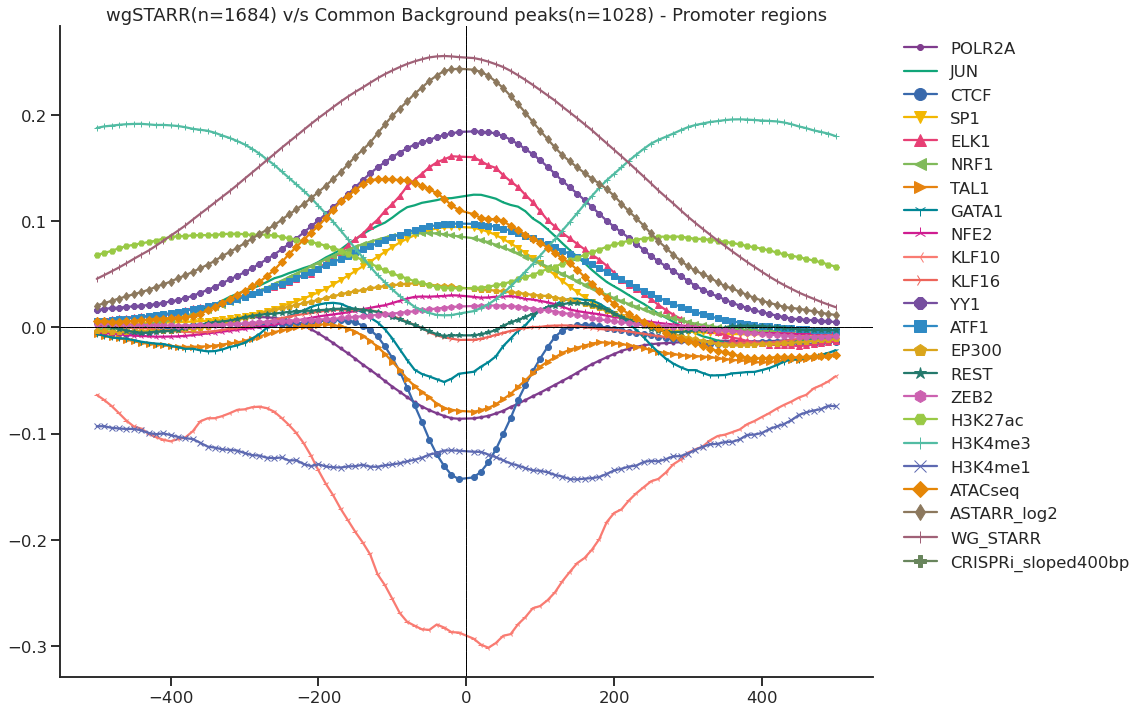

In [17]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    if hm2.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm2.matrix.matrix[:1684, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm2.matrix.matrix[:1684, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm2.matrix.matrix[1684:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR(n=1684) v/s Common Background peaks(n=1028) - Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/wgSTARR.active_v_commonBackground.Promoter.zoomed.pdf')

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


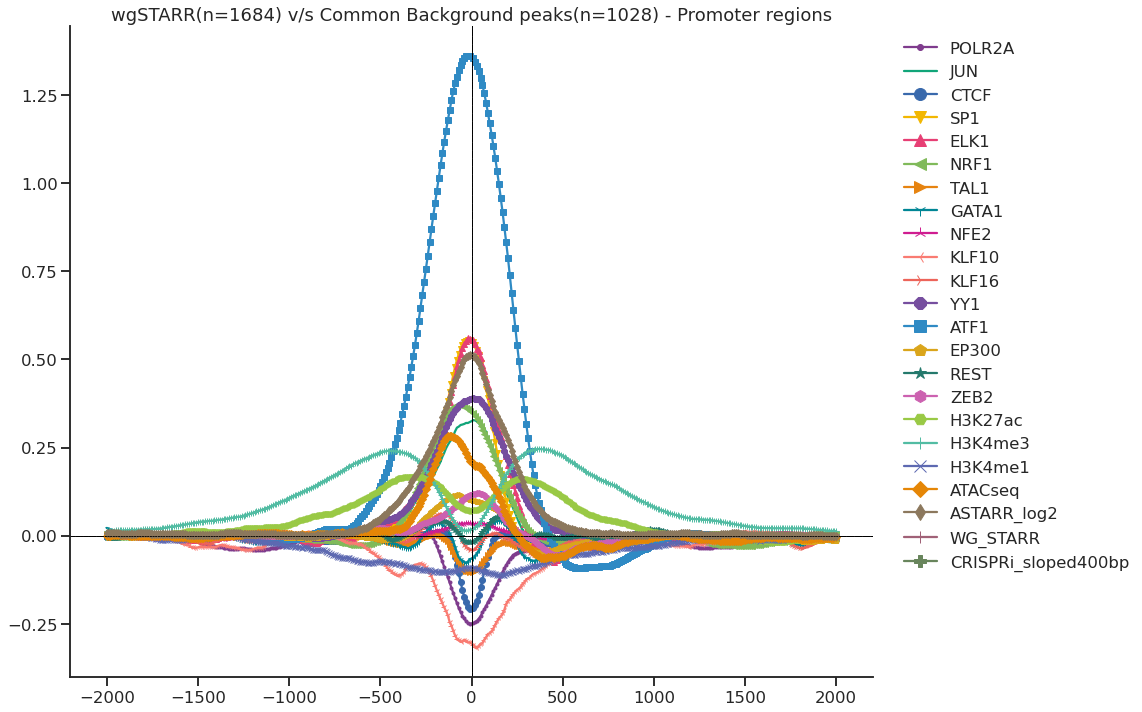

In [42]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    if hm2.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
               np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))/
                       (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR(n=1684) v/s Common Background peaks(n=1028) - Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

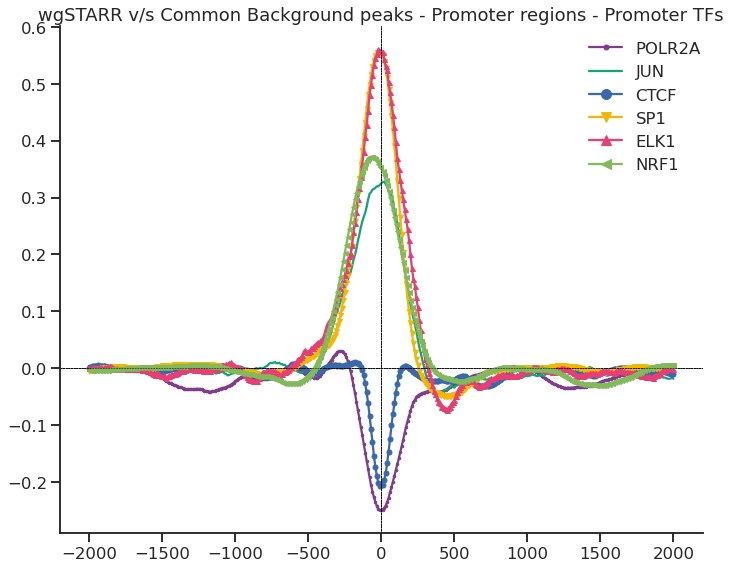

In [43]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'][0:6])):
    max_val=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Promoter regions - Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

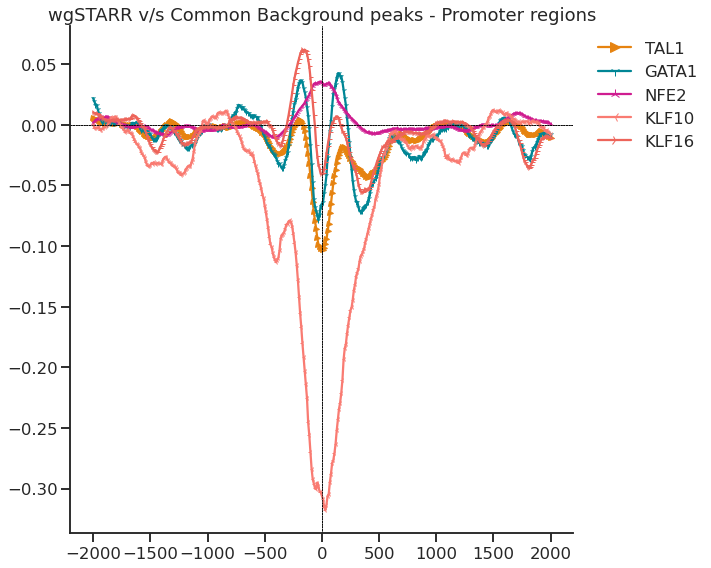

In [80]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(6,11):
    max_val=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Promoter regions")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

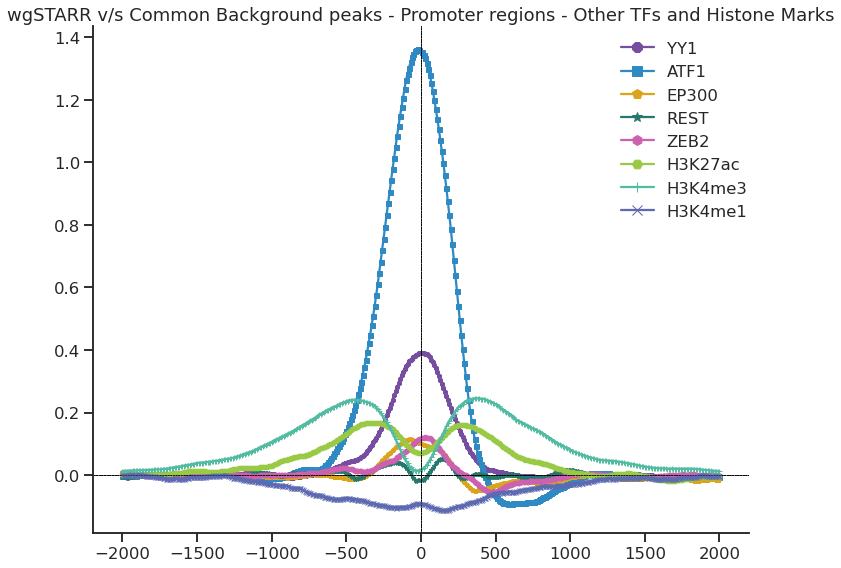

In [45]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Promoter regions - Other TFs and Histone Marks")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

In [18]:
hm3 = heatmapper.heatmapper() # create heatmapper object
hm3.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/wgSTARR_CommonBackgroundSet.rest.mat.gz')

hm3.__dict__['parameters']['group_boundaries']

[0, 3316, 6602]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


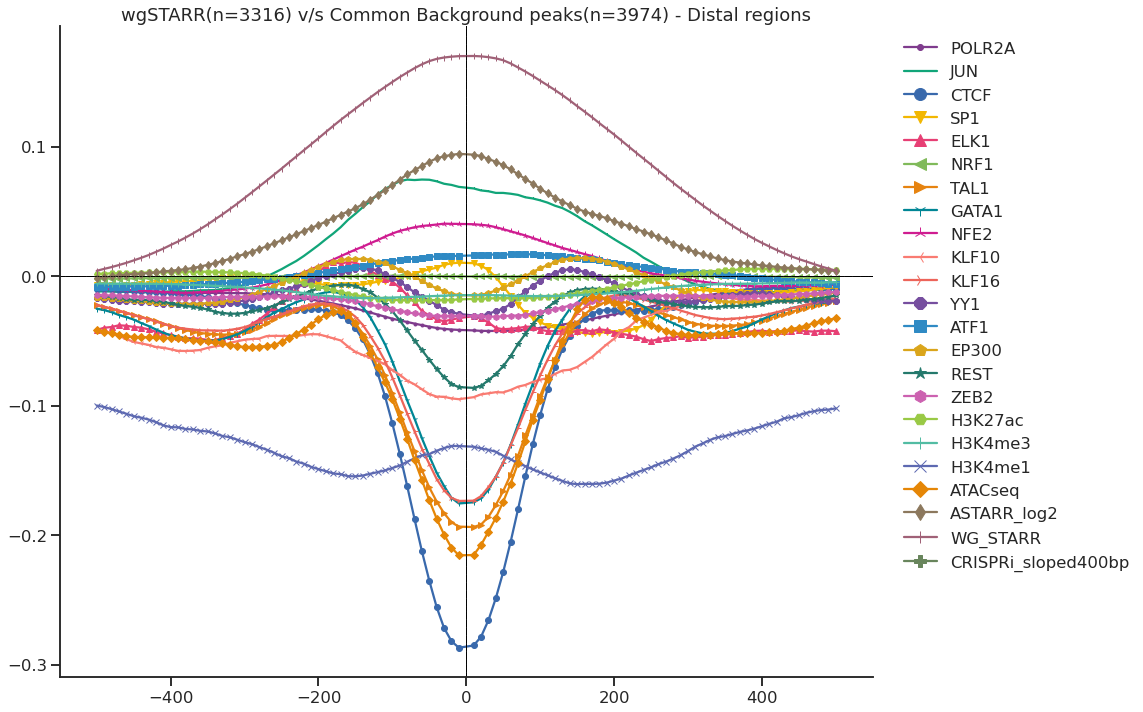

In [19]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm3.__dict__['parameters']['sample_labels'])):
    if hm3.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm3.matrix.matrix[:3316, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm3.matrix.matrix[:3316, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm3.matrix.matrix[3316:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR(n=3316) v/s Common Background peaks(n=3974) - Distal regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/wgSTARR.active_v_commonBackground.Distal.zoomed.pdf')

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


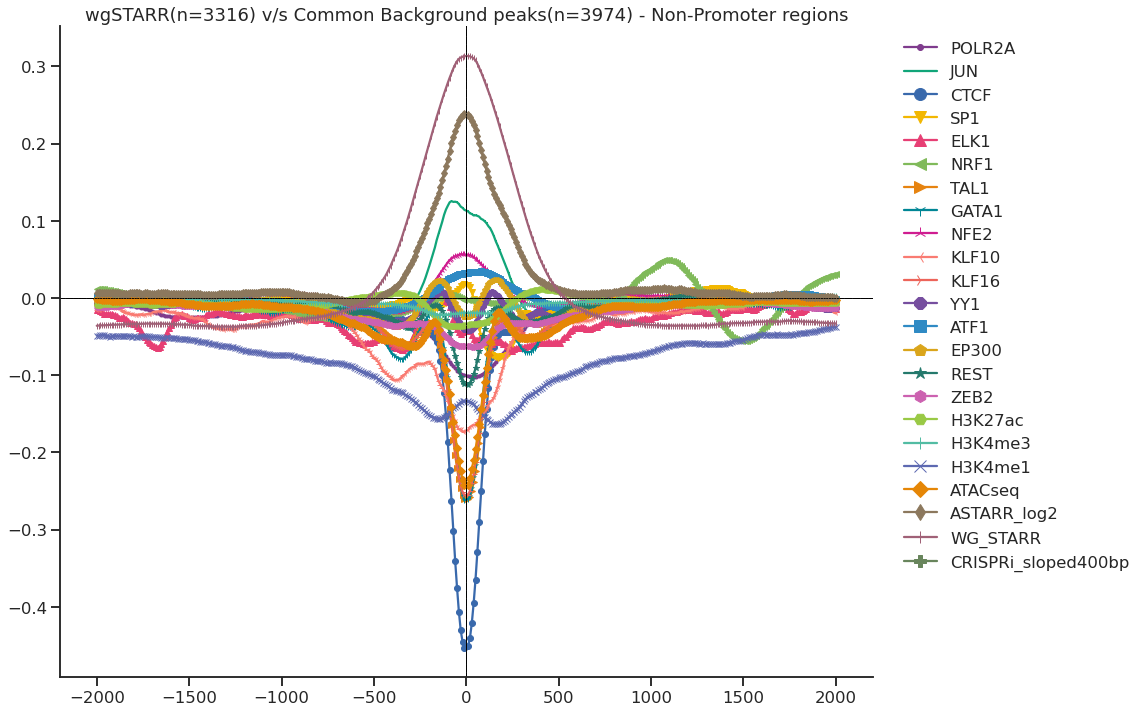

In [46]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm3.__dict__['parameters']['sample_labels'])):
    if hm3.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
               np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))/
                       (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR(n=3316) v/s Common Background peaks(n=3974) - Non-Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

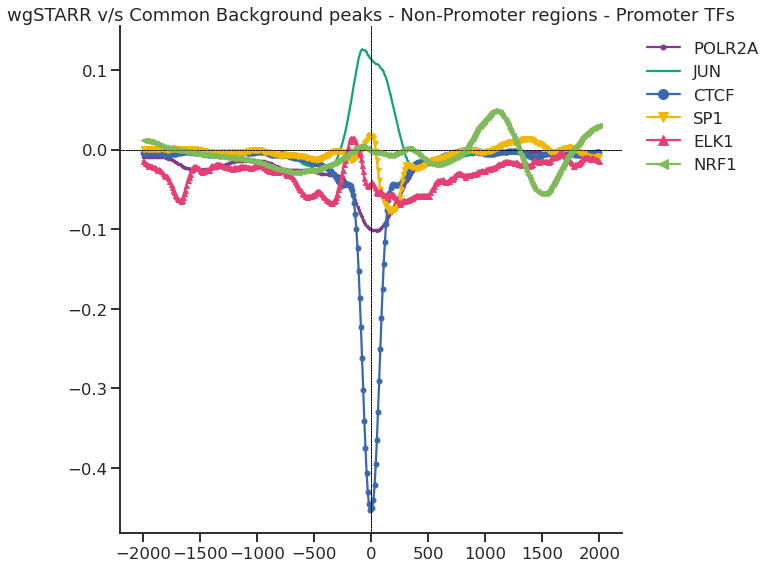

In [47]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm3.__dict__['parameters']['sample_labels'][0:6])):
    max_val=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Non-Promoter regions - Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

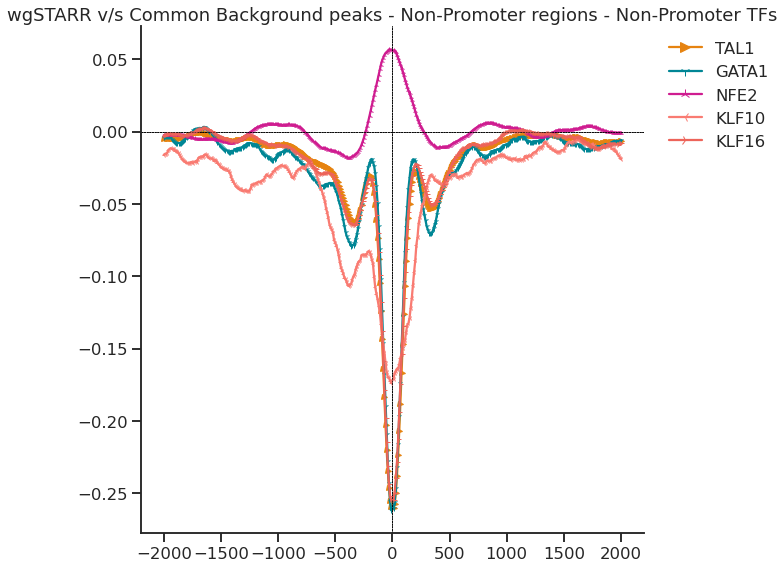

In [48]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(6,11):
    max_val=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Non-Promoter regions - Non-Promoter TFs")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

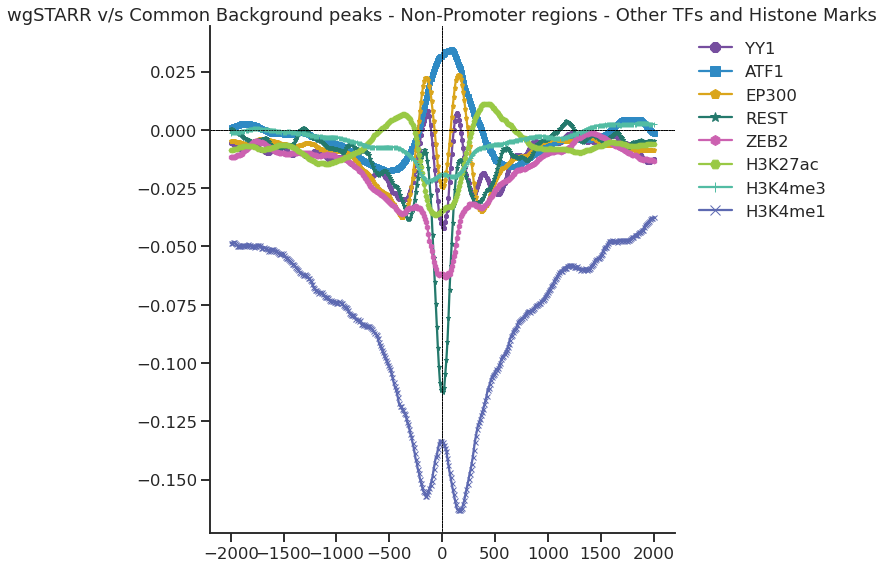

In [49]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Non-Promoter regions - Other TFs and Histone Marks")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

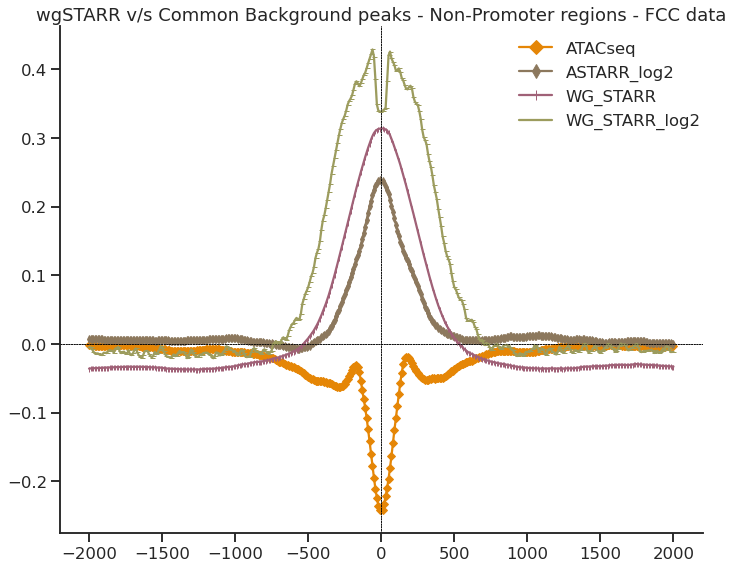

In [51]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(19,23):
    max_val=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
        np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)/
                (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count)), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=5,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
    
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR v/s Common Background peaks - Non-Promoter regions - FCC data")
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.promoter_TFs.v2.png')

# LentiMPRA profileplots

In [10]:
hm = heatmapper.heatmapper()
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.common_background.GC_content.random5k.V4.refpoint.mat.gz')

hm.__dict__['parameters']['group_boundaries']

[0, 2837, 7832, 12832, 17836]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


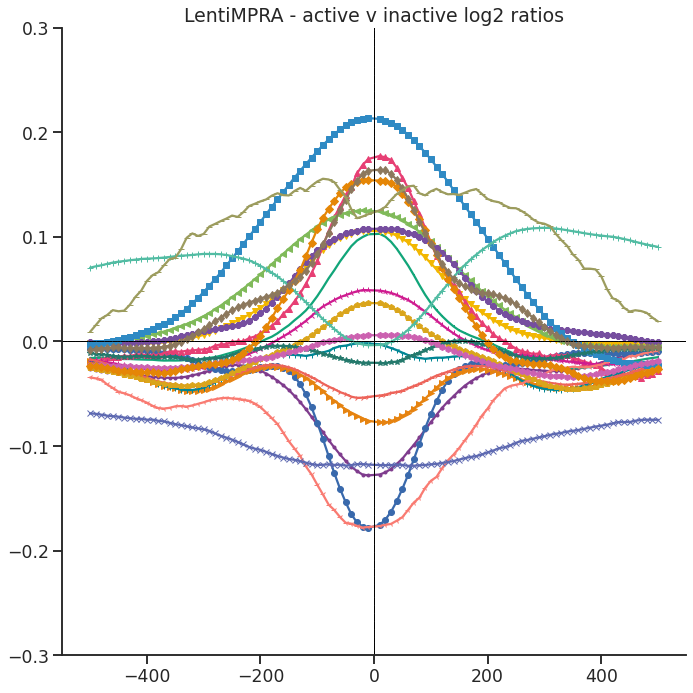

In [39]:
sns.set_context('talk', font_scale=1.05)
fig, ax = plt.subplots(figsize=[10,10])
for ii in range(len(hm.__dict__['parameters']['sample_labels'])):
    max_val=np.max(hm.matrix.matrix[2837:7832, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm.matrix.matrix[2837:7832, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm.matrix.matrix[12832:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
# lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("LentiMPRA - active v inactive log2 ratios")
plt.ylim([-0.3,0.3])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/lentiMPRA.active_v_inactive.zoomed.v2.png')

### Promoters

In [20]:
hm1 = heatmapper.heatmapper()
hm1.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lentiMPRA_CommonBackgroundSet.promoters.mat.gz')

hm1.__dict__['parameters']['group_boundaries']

[0, 1587, 2526]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


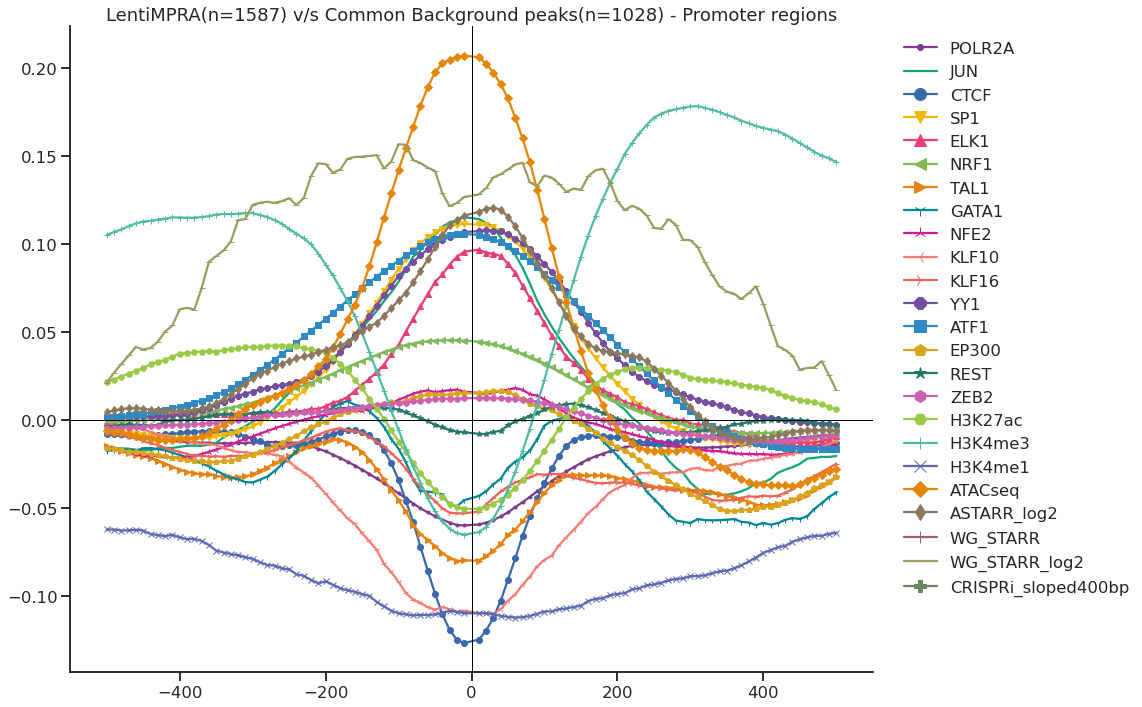

In [21]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm1.__dict__['parameters']['sample_labels'])):
#     if hm1.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm1.matrix.matrix[:1587, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm1.matrix.matrix[:1587, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm1.matrix.matrix[1587:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("LentiMPRA(n=1587) v/s Common Background peaks(n=1028) - Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/LentiMPRA.active_v_commonBackground.Promoter.zoomed.pdf')

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


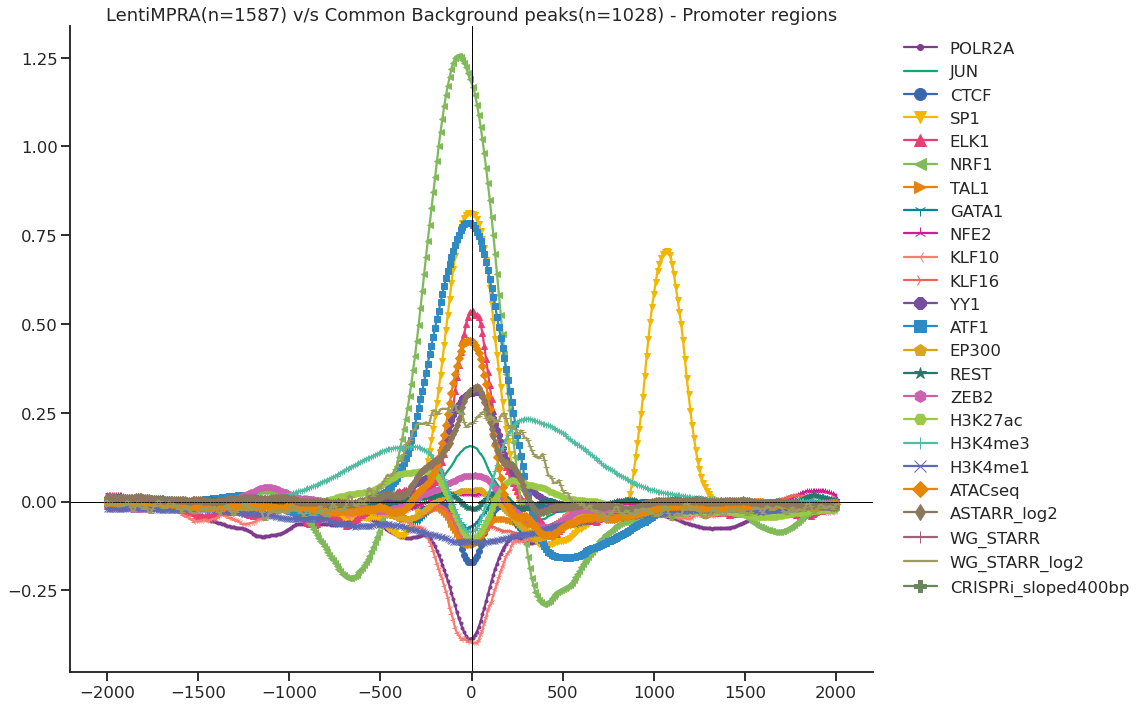

In [4]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm1.__dict__['parameters']['sample_labels'])):
    max_val=np.max(hm1.matrix.matrix[:1587, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
               np.log2((np.nanmean(hm1.matrix.matrix[:1587, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))/
                       (np.nanmean(hm1.matrix.matrix[1587:, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm1.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("LentiMPRA(n=1587) v/s Common Background peaks(n=939) - Promoter regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

### Distal

In [22]:
hm2 = heatmapper.heatmapper()
hm2.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lentiMPRA_CommonBackgroundSet.rest.mat.gz')

hm2.__dict__['parameters']['group_boundaries']

[0, 3408, 7473]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


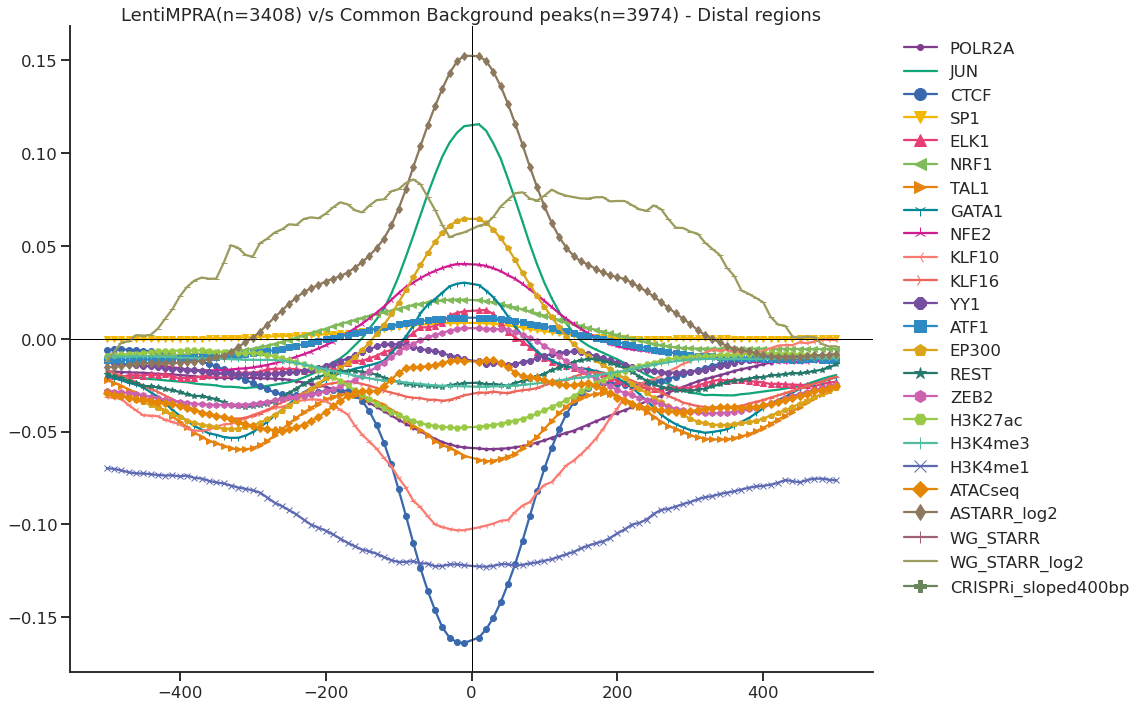

In [23]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
#     if hm2.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hm2.matrix.matrix[:3408, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm2.matrix.matrix[:3408, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm2.matrix.matrix[3408:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("LentiMPRA(n=3408) v/s Common Background peaks(n=3974) - Distal regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/LentiMPRA.active_v_commonBackground.Distal.zoomed.pdf')

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


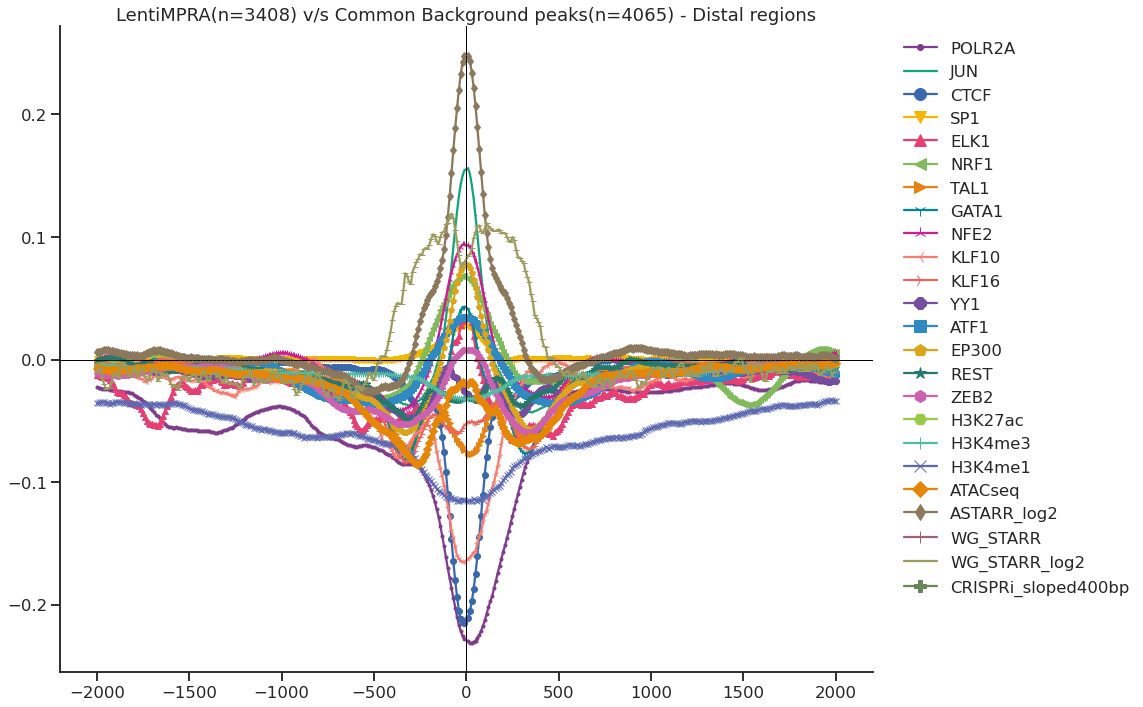

In [9]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    max_val=np.max(hm2.matrix.matrix[:3408, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10,
               np.log2((np.nanmean(hm2.matrix.matrix[:3408, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))/
                       (np.nanmean(hm2.matrix.matrix[3408:, (ii)*400:(ii+1)*400]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm2.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("LentiMPRA(n=3408) v/s Common Background peaks(n=4065) - Distal regions")
# plt.xlim([-500,500])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

### Difference in AUC for promoters and Distal

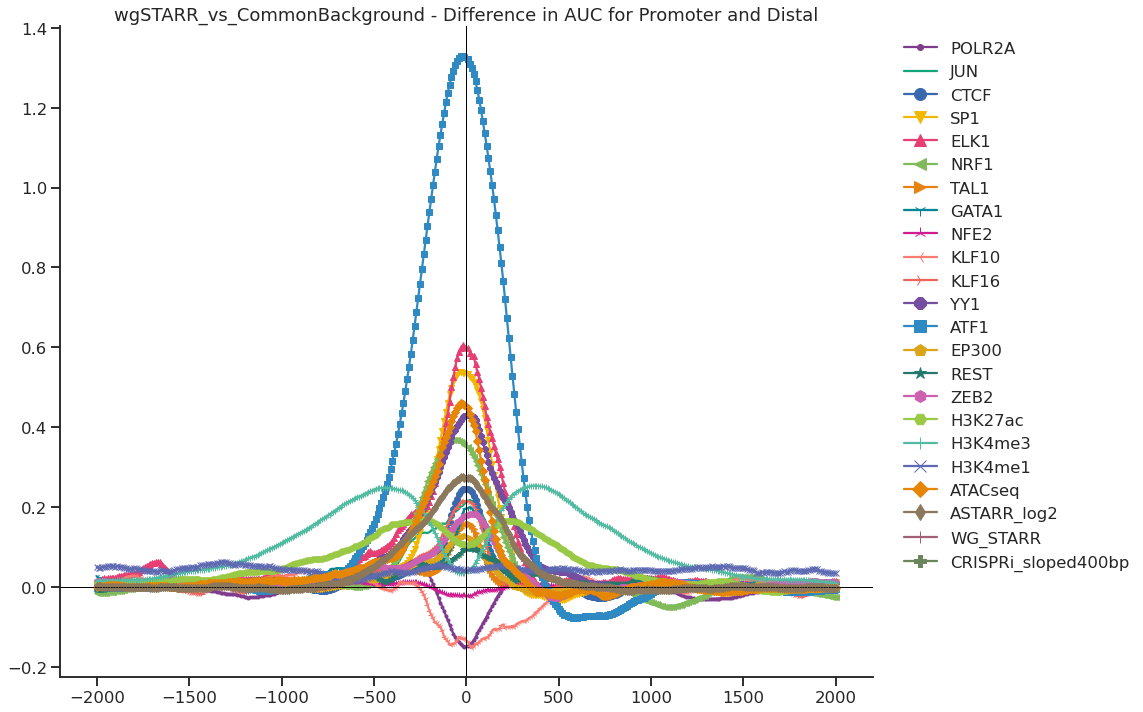

In [57]:
fig, ax = plt.subplots(figsize=[16,10])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    if hm2.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
        
    max_val_promoter=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
# plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

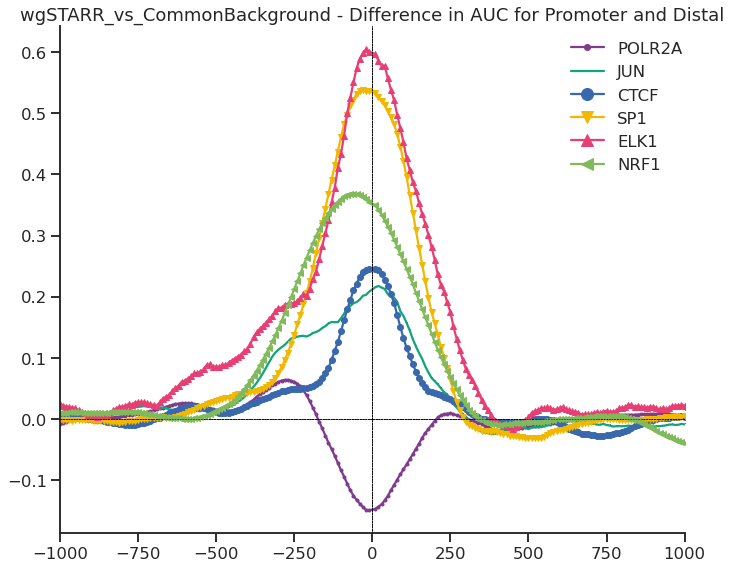

In [58]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(len(hm3.__dict__['parameters']['sample_labels'][0:6])):
    max_val_promoter=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

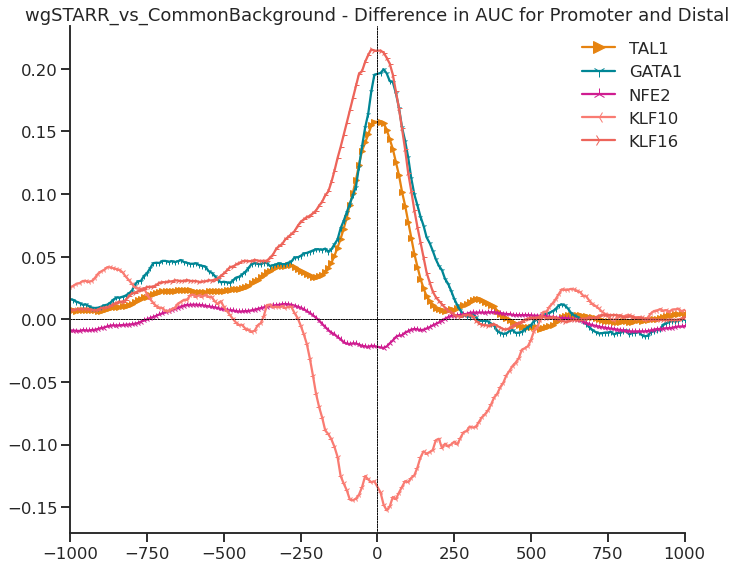

In [59]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(6,11):
    max_val_promoter=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

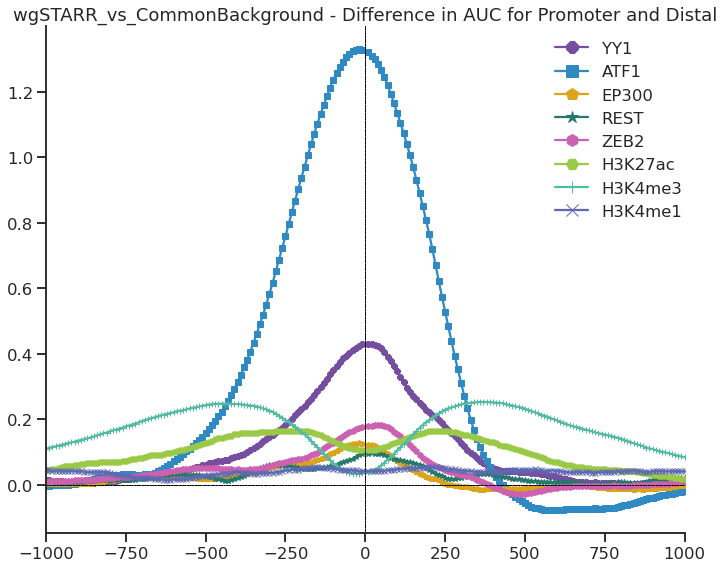

In [60]:
fig, ax = plt.subplots(figsize=[10,8])
for ii in range(11,19):
    max_val_promoter=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    plt.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm3.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("wgSTARR_vs_CommonBackground - Difference in AUC for Promoter and Distal")
plt.xlim([-1000,1000])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

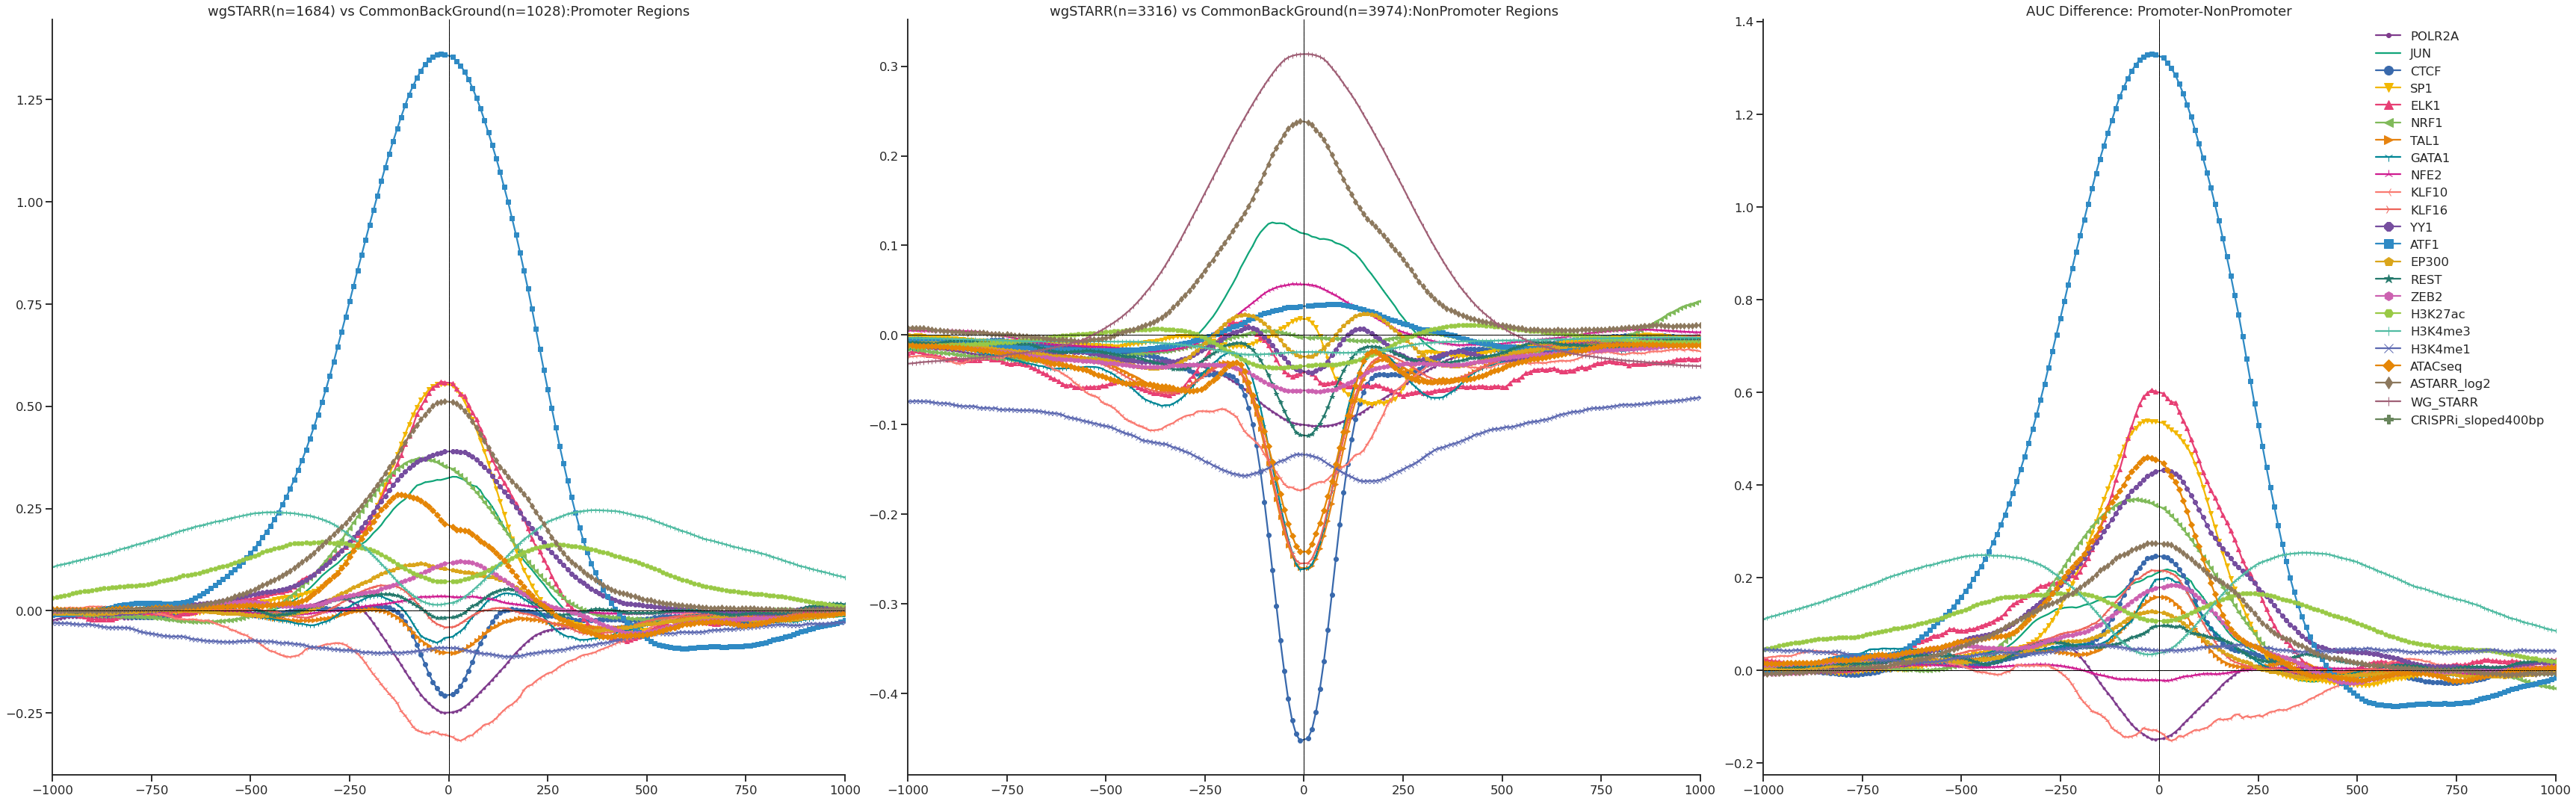

In [79]:
fig, ax = plt.subplots(1,3, figsize=[48,15])
for ii in range(len(hm2.__dict__['parameters']['sample_labels'])):
    if hm2.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
        
    max_val_promoter=np.max(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)
    max_val_distal=np.max(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)
    pseudo_count_promoter=np.percentile(max_val_promoter,10)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_promoter=np.log2((np.nanmean(hm2.matrix.matrix[:1684, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter)/
                           (np.nanmean(hm2.matrix.matrix[1684:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_promoter))
    logFC_distal=np.log2((np.nanmean(hm3.matrix.matrix[:3316, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal)/
                         (np.nanmean(hm3.matrix.matrix[3316:, (ii)*400:(ii+1)*400], axis=0)+pseudo_count_distal))
    
    ax1=ax.flatten()[0]
    ax1.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter, 
             color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii], markersize=6)
    ax1.axvline(0, color='black', ls='--', lw=.5)
    ax1.axhline(0, color='black', ls='--', lw=.5)
    ax1.set_xlim([-1000,1000])
    ax1.set_title('wgSTARR(n=1684) vs CommonBackGround(n=1028):Promoter Regions')
    
    ax2=ax.flatten()[1]
    ax2.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_distal, 
             color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii], markersize=6)
    ax2.axvline(0, color='black', ls='--', lw=.5)
    ax2.axhline(0, color='black', ls='--', lw=.5)
    ax2.set_xlim([-1000,1000])
    ax2.set_title('wgSTARR(n=3316) vs CommonBackGround(n=3974):NonPromoter Regions')
    
    ax3=ax.flatten()[2]
    ax3.plot(np.delete((np.arange(0,401)-200), 200)*10, logFC_promoter-logFC_distal, 
             color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,label=hm3.__dict__['parameters']['sample_labels'][ii])
    ax3.axvline(0, color='black', ls='--', lw=.5)
    ax3.axhline(0, color='black', ls='--', lw=.5)
    ax3.set_xlim([-1000,1000])
    ax3.set_title('AUC Difference: Promoter-NonPromoter')
    
lgnd = plt.legend(bbox_to_anchor=(1, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])

sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/astarr.active_v_inactive.log2.noASTARR_log2.v2.png')

## Sanity Check/QC 

replot one of the graphs (profile or heatmap) considering only wgSTARR peaks intersecting ATAC-seq peaks?

In [2]:
%%bash
bedtools intersect -wa \
-a /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/merged_enhancer_peak_orientation_independent.summits.random5000.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/inputs/ASTARR/KS91_K562_hg38_ASTARRseq_Input_allReps.masked.dedup.sorted_peaks.cut.narrowPeak \
> /data/reddylab/Revathy/tmp/wgSTARR_enhancer_peaks_summits.with_ATAC.bed

In [3]:
!head  /data/reddylab/Revathy/tmp/wgSTARR_enhancer_peaks_summits.with_ATAC.bed

chr7	74134320	74134420
chr16	69522820	69522920
chr2	112584380	112584480
chr11	75554440	75554540
chr22	37686340	37686440
chr1	223103380	223103480
chr5	17062830	17062930
chr1	26409400	26409500
chr2	105600960	105601060
chr17	76103810	76103910


In [4]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
computeMatrixOperations info -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.common_background.GC_content.random5k.V4.refpoint.mat.gz

Groups:
	merged_enhancer_peak_orientation_independent.summits.bed
	lentiMPRA_merged_enhancer_peak_orientation_independent.summits.random5000.bed
	merged_enhancer_peak_orientation_independent.summits.random5000.bed
	ASTARR_wgSTARR_LentiMPRA_100%_intersected.100bp_bins.logFC_filtered.with_ATAC_peaks.merged.random5000.bed
Samples:
	POLR2A
	JUN
	CTCF
	SP1
	ELK1
	NRF1
	TAL1
	GATA1
	NFE2
	KLF10
	KLF16
	YY1
	ATF1
	EP300
	REST
	ZEB2
	H3K27ac
	H3K4me3
	H3K4me1
	ATACseq
	ASTARR_log2
	WG_STARR
	WG_STARR_log2
	CRISPRi_sloped400bp


In [45]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
computeMatrixOperations relabel -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.common_background.GC_content.random5k.V4.refpoint.mat.gz \
-o /data/reddylab/Revathy/tmp/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.wgSTARR_with_ATAC.relabeled.mat.gz \
--groupLabels "merged_enhancer_peak_orientation_independent.summits.bed" "lentiMPRA_merged_enhancer_peak_orientation_independent.summits.random5000.bed" "wgSTARR_enhancer_peaks_summits.with_ATAC.bed" "ASTARR_wgSTARR_LentiMPRA_100%_intersected.100bp_bins.logFC_filtered.with_ATAC_peaks.merged.random5000.bed"

In [46]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
computeMatrixOperations info -m /data/reddylab/Revathy/tmp/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.wgSTARR_with_ATAC.relabeled.mat.gz

Groups:
	merged_enhancer_peak_orientation_independent.summits.bed
	lentiMPRA_merged_enhancer_peak_orientation_independent.summits.random5000.bed
	wgSTARR_enhancer_peaks_summits.with_ATAC.bed
	ASTARR_wgSTARR_LentiMPRA_100%_intersected.100bp_bins.logFC_filtered.with_ATAC_peaks.merged.random5000.bed
Samples:
	POLR2A
	JUN
	CTCF
	SP1
	ELK1
	NRF1
	TAL1
	GATA1
	NFE2
	KLF10
	KLF16
	YY1
	ATF1
	EP300
	REST
	ZEB2
	H3K27ac
	H3K4me3
	H3K4me1
	ATACseq
	ASTARR_log2
	WG_STARR
	WG_STARR_log2
	CRISPRi_sloped400bp


In [49]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=128G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/tmp/wgSTARR_ATAC_intersections.computematrixOperations.out \
    <<'EOF'
#!/bin/bash 
computeMatrixOperations sort -m /data/reddylab/Revathy/tmp/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.wgSTARR_with_ATAC.relabeled.mat.gz \
-R /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/merged_enhancer_peak_orientation_independent.summits.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/lentiMPRA_merged_enhancer_peak_orientation_independent.summits.random5000.bed \
/data/reddylab/Revathy/tmp/wgSTARR_enhancer_peaks_summits.with_ATAC.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/inputs/intersections/ASTARR_wgSTARR_LentiMPRA_100%_intersected.100bp_bins.logFC_filtered.with_ATAC_peaks.merged.random5000.bed \
-o /data/reddylab/Revathy/tmp/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.wgSTARR_with_ATAC.mat.gz
EOF

Submitted batch job 29917288


In [50]:
hmt = heatmapper.heatmapper()
hmt.read_matrix_file('/data/reddylab/Revathy/tmp/ASTARR_LentiMPRA_wgSTARR.active_vs_inactive_peaks.inactive_with_ATAC_peaks.wgSTARR_with_ATAC.mat.gz')

hmt.__dict__['parameters']['group_boundaries']

[0, 2837, 7832, 10874, 15878]

/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/data/reddylab/software/miniconda3/envs/alex_py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


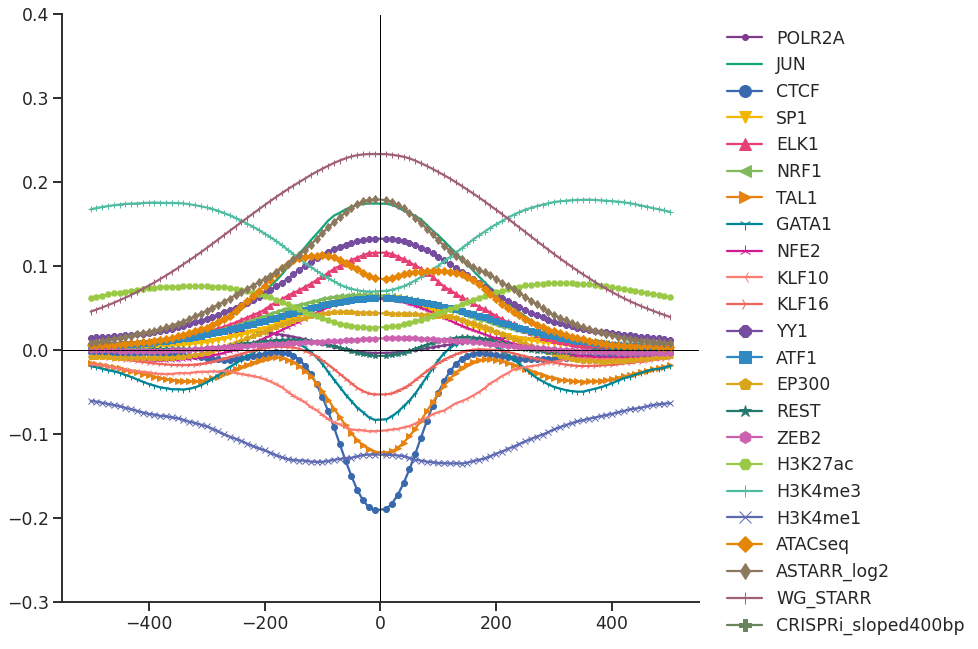

In [51]:
sns.set_context('talk', font_scale=1.05)
fig, ax = plt.subplots(figsize=[14,10])
for ii in range(len(hm.__dict__['parameters']['sample_labels'])):
    if hmt.__dict__['parameters']['sample_labels'][ii] == 'WG_STARR_log2': continue
    max_val=np.max(hmt.matrix.matrix[7832:10874, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hmt.matrix.matrix[7832:10874, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hmt.matrix.matrix[10874:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hmt.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
# plt.title("wgSTARR - active v inactive log2 ratios")
plt.ylim([-0.3,0.4])
sns.despine()
plt.tight_layout()
# fig.savefig('data/enhancer_call_comparison/profile_plots/wgstarr.active_v_inactive.log2.zoomed.png')

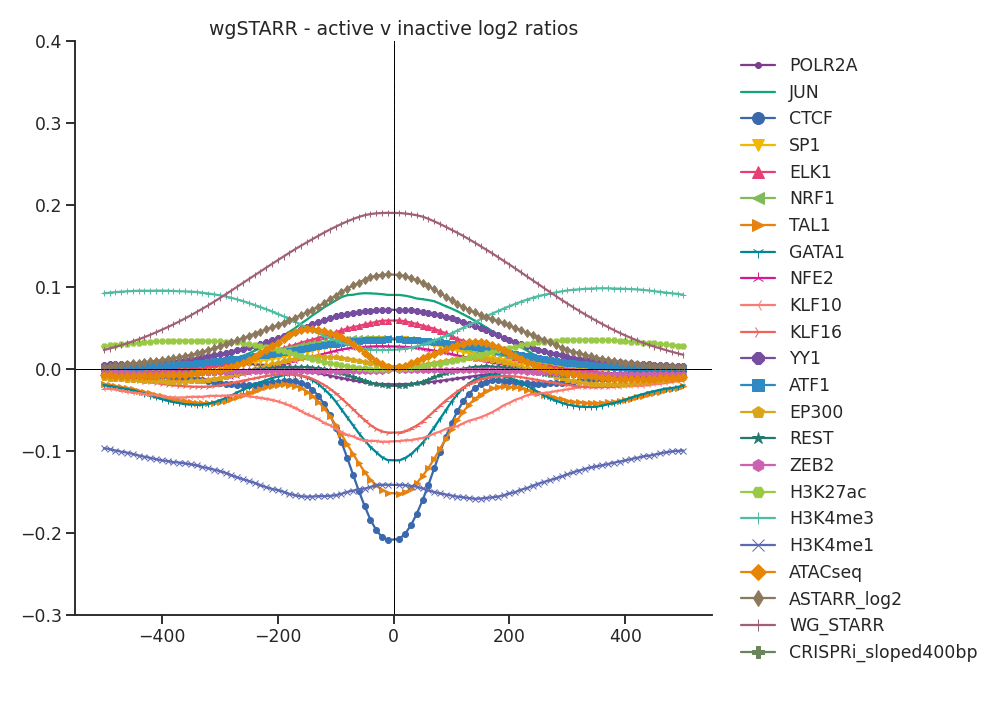

In [52]:
from IPython.display import Image
Image("data/enhancer_call_comparison/profile_plots/wgstarr.active_v_inactive.log2.zoomed.png")